In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def harmonic_shoot(x, y, beta):
    return [y[1], (x**2- beta) * y[0]]  

In [3]:
tol = 1e-4  # tolerance for eigenvalue convergence
colors = ['r', 'b', 'g', 'c', 'm', 'k']  # colors for plotting the eigenfunctions
L = 4  
x0 = [0, 1]  
x_range = np.linspace(-L, L, 81)  
beta_start = 50
dbeta = 0.1

In [4]:
A1 = []
A2 = []

Eigenvalue for mode 1: 44.94374999999993
Eigenvalue for mode 2: 40.181249999999864
Eigenvalue for mode 3: 35.7304687499998
Eigenvalue for mode 4: 31.59296874999974
Eigenvalue for mode 5: 27.769531249999684


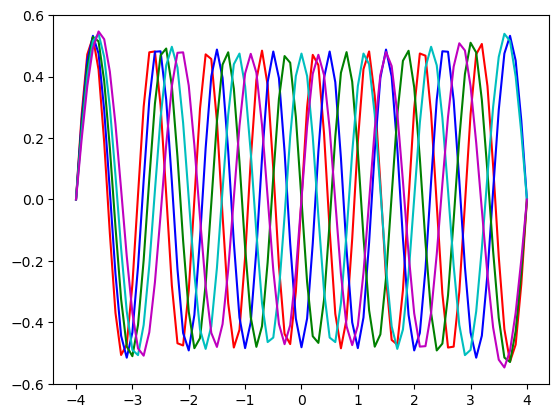

In [5]:
for mode in range(1, 6):
    beta = beta_start 
    dbeta = 0.1
    for _ in range(1000):  
        
        y = odeint(harmonic_shoot, x0, x_range, args=(beta,),tfirst=True)

        if abs(y[-1, 0]) < tol:  
            print(f"Eigenvalue for mode {mode}: {beta}")
            A2.append(beta)
            break
        
        if (-1) ** (mode + 1) * y[-1, 0] > 0:
            beta -= dbeta
        else:
            beta += dbeta / 2
            dbeta /= 2
    
    norm = np.trapz(y[:, 0] ** 2, x_range)
    normalized_eigenfunction = y[:, 0] / np.sqrt(norm)
    A1.append(normalized_eigenfunction)
    plt.plot(x_range, normalized_eigenfunction, colors [mode-1], label=f'Mode {mode}')
    
    beta_start = beta - 0.1


In [6]:
A1 = np.array(A1)
display(A1)


array([[ 0.00000000e+00,  2.76333874e-01,  4.72209932e-01,
         5.27513196e-01,  4.22237456e-01,  1.85691410e-01,
        -1.09608072e-01, -3.69003044e-01, -5.06046653e-01,
        -4.72444478e-01, -2.76895928e-01,  1.49799232e-02,
         3.01261381e-01,  4.78959665e-01,  4.81823759e-01,
         3.06573421e-01,  1.66778979e-02, -2.79301043e-01,
        -4.67951702e-01, -4.75057890e-01, -2.96091221e-01,
        -1.41247845e-04,  2.95672350e-01,  4.72264223e-01,
         4.57074490e-01,  2.54972304e-01, -5.20340329e-02,
        -3.37322374e-01, -4.81799116e-01, -4.24153829e-01,
        -1.87734710e-01,  1.28107276e-01,  3.89372417e-01,
         4.84363431e-01,  3.71905228e-01,  9.97524474e-02,
        -2.15295536e-01, -4.37437378e-01, -4.70590619e-01,
        -3.00232657e-01,  4.20581440e-05,  3.00298546e-01,
         4.70609775e-01,  4.37401520e-01,  2.15220164e-01,
        -9.98348351e-02, -3.71959166e-01, -4.84365763e-01,
        -3.89322118e-01, -1.28025796e-01,  1.87812689e-0

In [7]:
A2 = np.array(A2)
display(A2)

array([44.94375   , 40.18125   , 35.73046875, 31.59296875, 27.76953125])